In [18]:
import torch.nn as nn
from torchvision.models import resnet18,vgg19,googlenet,resnet34,resnet50
import torch
import torchvision
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import os
from torchsummary import summary

In [85]:
#switch to execute the desired model
vgg19_switch = True
resnet18_switch = False
resnet34_switch = False
resnet50_switch = False
googlenet_switch = False

In [86]:
#Change the model number for the model you want to make predictions for
#model1 for the baseline model
#model2 for data transformation+LR rate scheduler mode ehancement
#model3 this has been built only for 
###VGG19 to update the architecture for vgg 19 to include dropout after every maxpool and mish activation
if vgg19_switch:
    DIR = '/Users/sudiptamondal/Documents/QMUL/Deep Learning with Computer Vision/DL CV Project/CIFAR10_VGG19/Model2'
if resnet18_switch:
    DIR = '/Users/sudiptamondal/Documents/QMUL/Deep Learning with Computer Vision/DL CV Project/CIFAR10_RESNET18/Model2'
if resnet34_switch:
    DIR = '/Users/sudiptamondal/Documents/QMUL/Deep Learning with Computer Vision/DL CV Project/CIFAR10_RESNET34/Model2'
if resnet50_switch:
    DIR = '/Users/sudiptamondal/Documents/QMUL/Deep Learning with Computer Vision/DL CV Project/CIFAR10_RESNET50/Model1'
if googlenet_switch:
    DIR = '/Users/sudiptamondal/Documents/QMUL/Deep Learning with Computer Vision/DL CV Project/CIFAR10_GOOGLENET/Model2'

In [87]:
MODEL_PATH = os.path.join(DIR,'model.pth')

In [88]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [89]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [90]:
test_data = torchvision.datasets.CIFAR10('Data', train=False, download=True,
                                       transform=torchvision.transforms.Compose([
                                           torchvision.transforms.ToTensor(),
                                           torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))]))

Files already downloaded and verified


In [91]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

In [92]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

<ipython-input-93-adfb733c5062>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 10 / 2, idx + 1, xticks=[], yticks=[])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

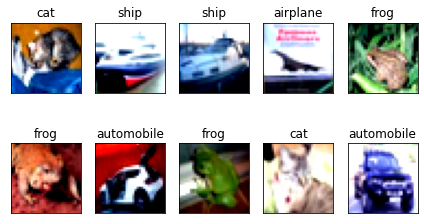

In [93]:
# obtain one batch of training images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.numpy()  # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure()
# display 10 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10 / 2, idx + 1, xticks=[], yticks=[])
    plt.tight_layout()
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [94]:
""" GoogleNet"""
class GoogleNet(nn.Module):
  def __init__(self):
    super(GoogleNet,self).__init__()
    # define model
    self.model = googlenet(pretrained=False,num_classes=10,aux_logits=False)

  def forward(self,x):
    return self.model(x)

In [95]:
""" VGG19"""
class VGG19(nn.Module):
    def __init__(self):
        super(VGG19, self).__init__()
        # define model
        self.model = vgg19(pretrained=False, num_classes=10)

    def forward(self, x):
        return self.model(x)

In [96]:
""" Resnet18"""
class ResNet18(nn.Module):
    def __init__(self):
        super(ResNet18, self).__init__()
        # define model
        self.model = resnet18(pretrained=False, num_classes=10)

    def forward(self, x):
        return self.model(x)

In [97]:
""" Resnet34"""
class ResNet34(nn.Module):
    def __init__(self):
        super(ResNet34, self).__init__()
        # define model
        self.model = resnet34(pretrained=False, num_classes=10)

    def forward(self, x):
        return self.model(x)

In [98]:
""" Resnet50"""
class ResNet50(nn.Module):
    def __init__(self):
        super(ResNet50, self).__init__()
        # define model
        self.model = resnet50(pretrained=False, num_classes=10)

    def forward(self, x):
        return self.model(x)

In [99]:
#trained on GPU but load on CPU
device = torch.device('cpu')
if resnet18_switch:
    network = ResNet18()

if resnet34_switch:
    network = ResNet34()

if resnet50_switch:
    network = ResNet50()
    
if vgg19_switch:
    network = VGG19()
    
if googlenet_switch:
    network = GoogleNet()
    
#load model
network.load_state_dict(torch.load(MODEL_PATH,map_location=device))
print(summary(network,(3, 32, 32)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

<ipython-input-100-ad3c39ddc71f>:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for float

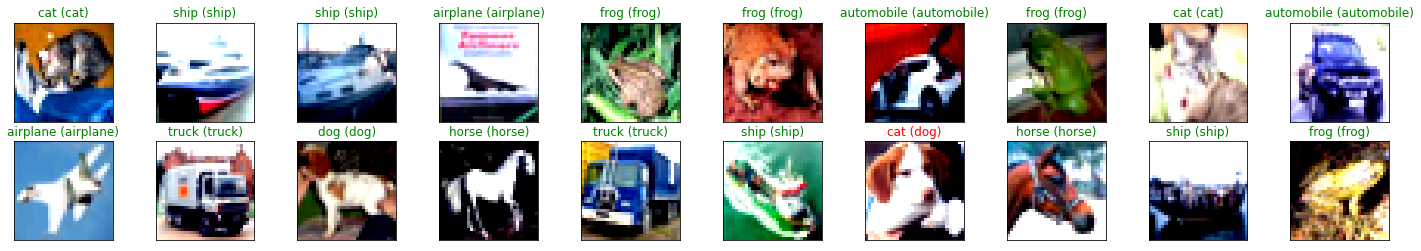

In [100]:
"""Visualise the model's output from a trained model"""
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.to(device)

# get sample outputs
output = network(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

plt.savefig(DIR+'CIFAR10_inference.png')
plt.show()
plt.close()